# CapsNets on Mnist dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

In [3]:
# Setting PATH to import utils functions from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from utils.load_data import load_mnist

## Loading dataset and normalising

In [4]:
(X_train, y_train), (X_test , y_test) = load_mnist(size=(1024, 512))

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

1024 images of size 28x28 over one channel

## Sample visualisation

In [5]:
classes = np.arange(10)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

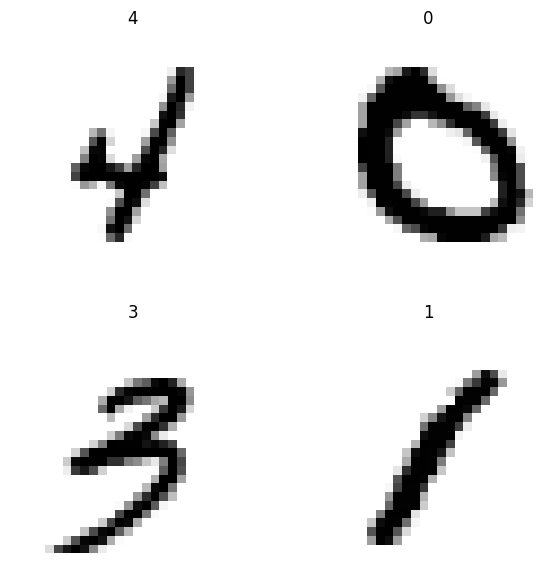

In [6]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(y_train[rand_index])
  plt.axis(False)

## Build CapsNet model

In [7]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [8]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
}

model = CapsNet(**params)
model._name = 'CapsNet-MNIST'
model.compile()
model.summary()

Model: "CapsNet-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'precision', 'recall', 'f1'])

Epoch 10/10: 100%|██████████| 16/16 [00:06<00:00,  2.44it/s, Loss : 0.0002]


{'accuracy': ListWrapper([0.759765625, 0.900390625, 0.9462890625, 0.970703125, 0.982421875, 0.9892578125, 0.9921875, 0.9951171875, 0.99609375, 0.998046875]),
 'precision': ListWrapper([0.8021956492012233, 0.904679696168855, 0.9467450671429922, 0.9710449424506911, 0.982573838340221, 0.9894255063083919, 0.9922700914502143, 0.9951854032628675, 0.9961523916207107, 0.9980851715686274]),
 'recall': ListWrapper([0.759765625, 0.900390625, 0.9462890625, 0.970703125, 0.982421875, 0.9892578125, 0.9921875, 0.9951171875, 0.99609375, 0.998046875]),
 'f1': ListWrapper([0.7544356585197597, 0.8994972510886154, 0.9462311815591984, 0.9706937902281054, 0.98240894162276, 0.9892766776119348, 0.9921900751353832, 0.995121499309428, 0.9961037197355653, 0.9980515311770161]),
 'loss': ListWrapper([0.0078518595546484, 0.002954524476081133, 0.0017347628017887473, 0.0011280779726803303, 0.0007977333734743297, 0.0006072655087336898, 0.00045118521666154265, 0.0003632463631220162, 0.00029385683592408895, 0.00022747207

In [10]:
preds = model.predict(X_test)

## Loading and saving

INFO:tensorflow:Assets written to: ../saved_models/CapsNet-MNIST/assets


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-MNIST/assets


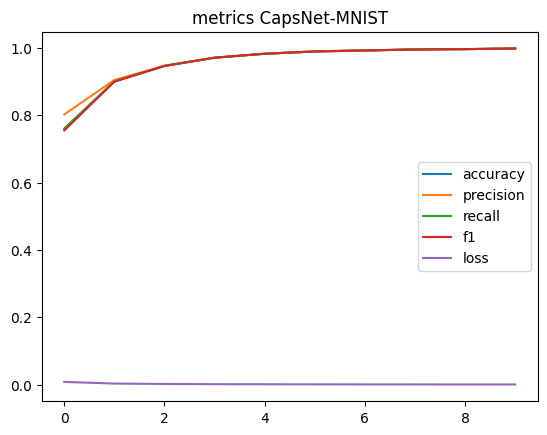

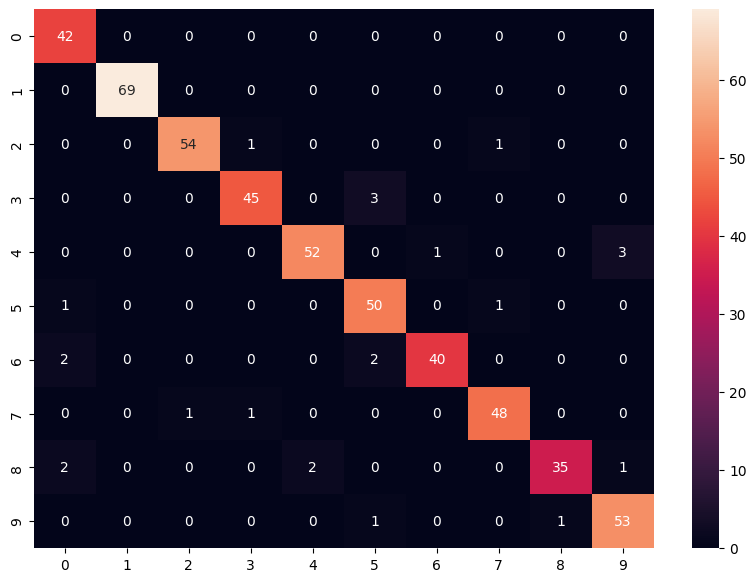

In [11]:
model.save(evaluate=(X_test, y_test), classes=np.arange(10))

In [14]:
loaded_model = tf.keras.models.load_model('../saved_models/CapsNet-MNIST', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "CapsNet-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense_2 (Dense)             multiple                  82432     
                                                                 
 dense_3 (Dense)             multiple                  525312    
                                                                 
 dense (Dense)               multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________
